<a href="https://colab.research.google.com/github/pankajr141/experiments/blob/master/Reasoning/timeseries/largest_common_subsequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install tslearn --quiet

In [25]:
import tslearn
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Lets generate some random data and adjust it to have a mean of 0 and standard deviation of 1

In [26]:
dataset = random_walks(n_ts=2, sz=100, d=1, random_state=0)
dataset_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(dataset)
dataset_scaled.shape

(2, 100, 1)

In [29]:
df = pd.DataFrame(dataset_scaled[:, :, 0].T, columns=['x', 'y'])
df.head()

,x,y
0,-0.756436,-1.728092
1,-0.675906,-2.055026
2,-0.478938,-2.363216
3,-0.027966,-2.128063
4,0.347873,-2.412636


lets visualize our 2 timeseries

<AxesSubplot:>

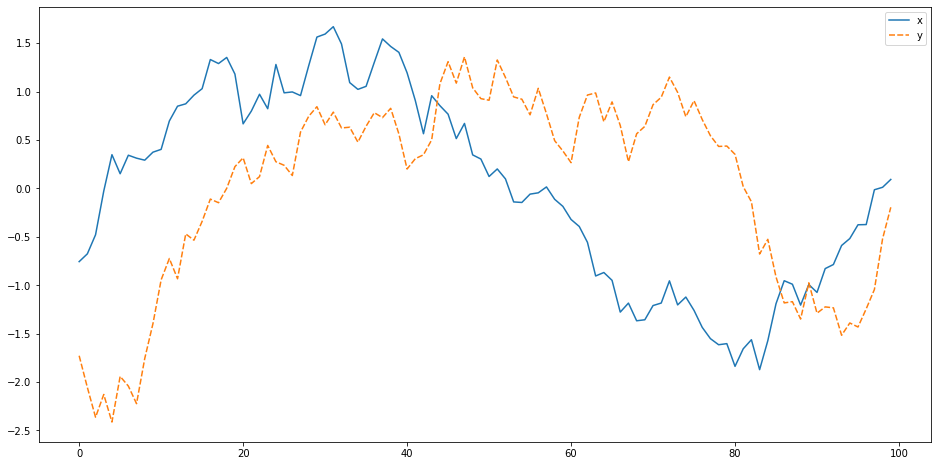

In [28]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df)

In [34]:
lcss_score = tslearn.metrics.lcss(df['x'], df['y'])
print("lcss_score:", lcss_score)

lcss_score: 0.82


In [46]:
lcss_path, lcss_score = tslearn.metrics.lcss_path(df['x'], df['y'])
print("lcss_path:", lcss_path)

lcss_path: [(0, 15), (1, 16), (2, 17), (3, 18), (4, 19), (5, 20), (6, 21), (7, 22), (8, 23), (9, 24), (10, 25), (11, 26), (12, 27), (13, 28), (14, 29), (15, 30), (16, 31), (17, 32), (18, 33), (19, 34), (20, 35), (21, 36), (22, 37), (23, 38), (24, 39), (25, 40), (26, 41), (27, 42), (28, 43), (29, 44), (30, 45), (31, 46), (32, 47), (33, 48), (34, 49), (35, 50), (36, 51), (37, 52), (38, 53), (39, 54), (40, 55), (41, 56), (42, 57), (43, 58), (44, 59), (45, 60), (46, 61), (47, 62), (48, 63), (49, 64), (50, 65), (51, 66), (52, 67), (53, 68), (54, 69), (55, 70), (56, 71), (57, 73), (58, 74), (59, 76), (60, 77), (61, 78), (62, 79), (72, 81), (74, 82), (75, 83), (76, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (98, 98), (99, 99)]


lets visualize lcss path between 2 timeseries

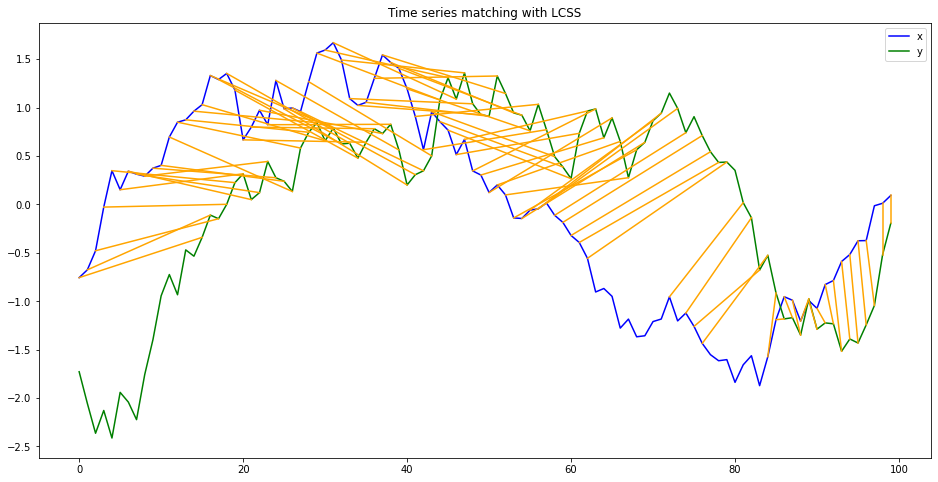

In [49]:
plt.figure(1, figsize=(16, 8))
plt.plot(df['x'], "b-", label='x')
plt.plot(df['y'], "g-", label='y')

for positions in lcss_path:
    plt.plot([positions[0], positions[1]],
             [df['x'].tolist()[positions[0]], df['y'].tolist()[positions[1]]], color='orange')
    
plt.legend()
plt.title("Time series matching with LCSS")
plt.show()